# Project: Investigate a Relational Database
Author: Nhan V. Ng
Date: 2024/03/05

## Introduction
In this project, you will query the Sakila DVD Rental database. The Sakila Database holds information about a company that rents movie DVDs. For this project, you will be querying the database to gain an understanding of the customer base, such as what the patterns in movie watching are across different customer groups, how they compare on payment earnings, and how the stores compare in their performance. To assist you in the queries ahead, the schema for the DVD Rental database is provided below.

(Note: One quirk you may notice as you explore this "fake" database is that the rental dates are all from 2005 and 2006, while the payment dates are all from 2007. Don't worry about this. )

Source: [http://www.postgresqltutorial.com/postgresql-sample-database/](http://www.postgresqltutorial.com/postgresql-sample-database/)

<img src="./erd.png" />

In [ ]:
!pip install pandas matplotlib

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

### Question 1
Lists each movie, the film category it is classified in, and the number of times it has been rented out.

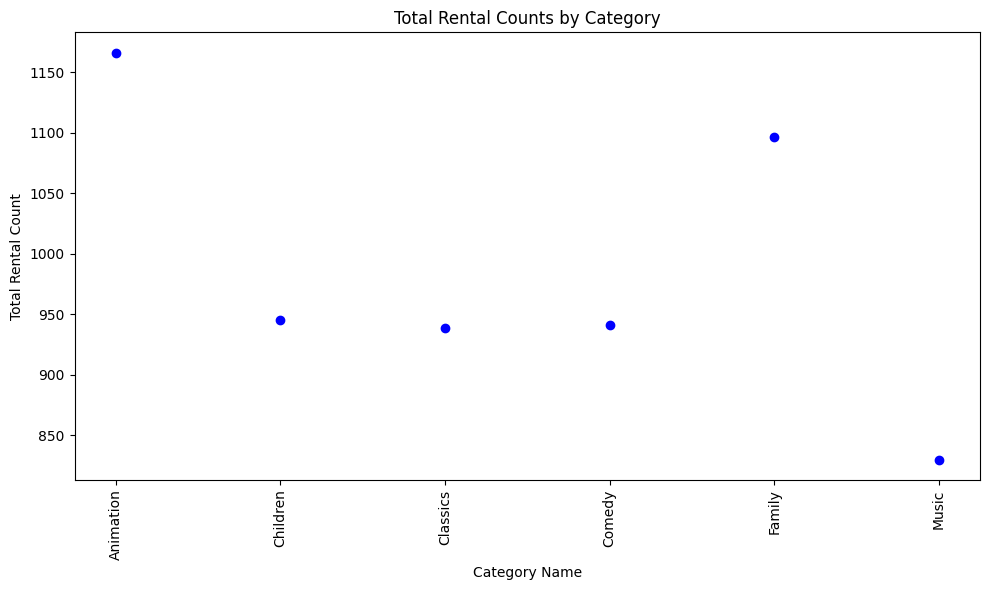

In [10]:
df = pd.read_csv('data/s1_q1.csv')

# Aggregate data by category and calculate total rental counts
category_rentals = df.groupby('category_name')['rental_count'].sum()

# Plot scatter graph
plt.figure(figsize=(10, 6))
plt.scatter(category_rentals.index, category_rentals.values, color='blue')
plt.title('Total Rental Counts by Category')
plt.xlabel('Category Name')
plt.ylabel('Total Rental Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

From the chart, we can see that 'Animation' has the highest rental count, exceeding 1150 rentals. The next highest categories appear to be 'Family' and 'Comedy,' with over 1000 rentals each. 'Children,' 'Classics,' and 'Music' categories have lower rental counts, with 'Music' being the lowest, falling around 850 rentals.

### Question 2
The movie titles and divide them into 4 levels (first_quarter, second_quarter, third_quarter, and final_quarter) based on the quartiles (25%, 50%, 75%) of the average rental duration(in the number of days) for movies across all categories?

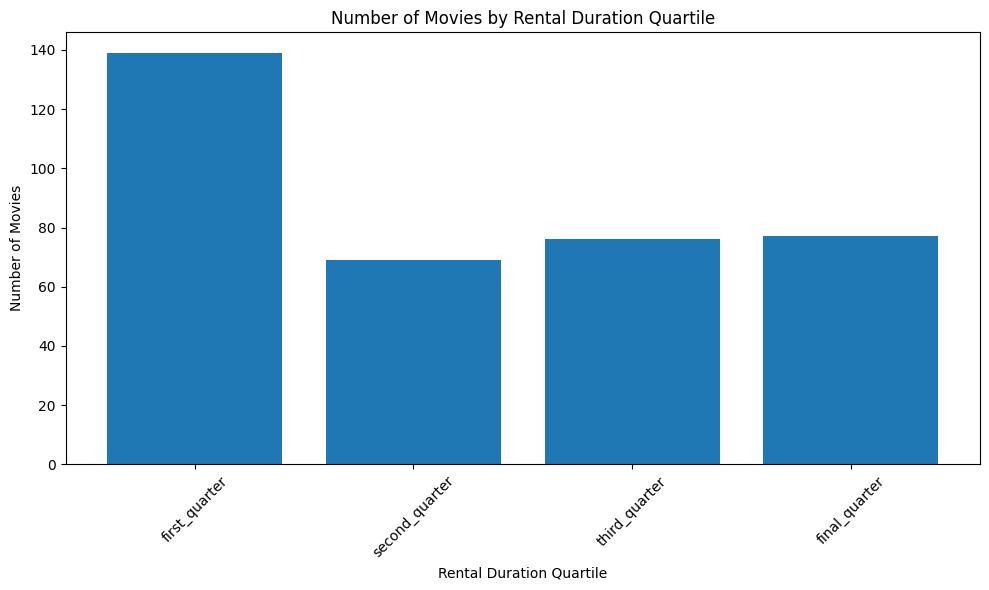

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV file into a pandas DataFrame
df = pd.read_csv("data/s1_q2.csv")

quartile_labels = ['first_quarter', 'second_quarter', 'third_quarter', 'final_quarter']
df['rental_duration_quartile'] = pd.qcut(df['rental_duration'], q=4, labels=quartile_labels)

quartile_counts = df['rental_duration_quartile'].value_counts()
quartile_counts = quartile_counts.sort_index()
plt.figure(figsize=(10, 6))
plt.bar(quartile_counts.index, quartile_counts.values)
plt.title('Number of Movies by Rental Duration Quartile')
plt.xlabel('Rental Duration Quartile')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

This chart suggests that there are more movies in the first quartile than in the other three quartiles, indicating that a larger number of movies have a shorter average rental duration. The second, third, and final quartiles have a relatively similar number of movies, which indicates a more even distribution of movie rental durations within these three quartiles.

### Question 3:
Provide a table with the family-friendly film category, each of the quartiles, and the corresponding count of movies within each combination of film category for each corresponding rental duration category. The resulting table should have three columns:

    - Category
    - Rental length category
    - Count

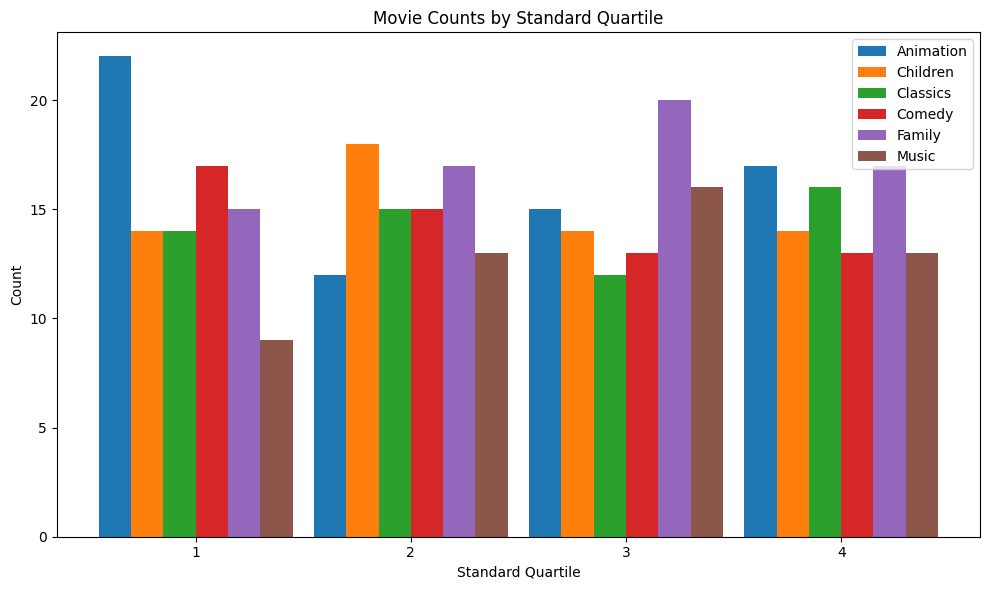

In [15]:
df = pd.read_csv("data/s1_q3.csv")
plt.figure(figsize=(10, 6))
bar_width = 0.15
index = df['standard_quartile'].unique()

for i, category in enumerate(df['name'].unique()):
    subset = df[df['name'] == category]
    plt.bar(index + i * bar_width, subset['count'], bar_width, label=category)

plt.xlabel('Standard Quartile')
plt.ylabel('Count')
plt.title('Movie Counts by Standard Quartile')
plt.xticks(index + bar_width * (len(df['name'].unique()) - 1) / 2, index)
plt.legend()
plt.tight_layout()
plt.show()


- Animation: There is a high count in the first quartile, which diminishes progressively in the following quartiles.
- Children: This category also starts strong in the first quartile but then decreases, with a slight increase in the third quartile.
- Classics: The count of classic movies is relatively steady across all quartiles, with a slight dip in the third.
- Comedy: There is a gradual decrease in the number of comedy movies from the first to the fourth quartile.
- Family: The family genre shows an increase in the second quartile, decreases in the third, and then increases again in the fourth.
- Music: This genre has the least number of movies in all quartiles except the third, where there's a slight peak.

Animation and Children genres are most prevalent in the first quartile, indicating a higher count of movies in these genres that fall into this quartile. All genres except for Classics and Music show a decreasing trend, with Classics being relatively stable and Music having the lowest counts across the board.

### Question 4: 
Count of rental orders during every month for all the years 


<Figure size 1000x600 with 0 Axes>

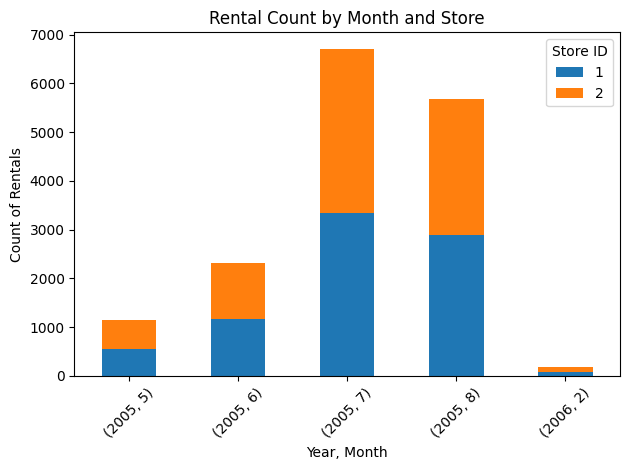

In [23]:
df = pd.read_csv("data/s2_q1.csv")
pivot_df = df.pivot_table(index=['rental_year', 'rental_month'], columns='store_id', values='count_rentals').fillna(0)

# Plotting
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=True)
plt.title('Rental Count by Month and Store')
plt.xlabel('Year, Month')
plt.ylabel('Count of Rentals')
plt.xticks(rotation=45)
plt.legend(title='Store ID')
plt.tight_layout()
plt.show()

1. Rental activity is higher in July for both stores, with Store 1 having a slightly larger share of the rentals.
2. Store 2 consistently has fewer rentals than Store 1 across the months shown, except for January 2006, where Store 2 has a minimal number of rentals.
3. The least amount of rental activity for both stores occurred in May and January, with January having an exceptionally low number of rentals for Store 2.
4. June and July seem to be the busiest months for rentals for these stores.

Overall, Store 1 seems to outperform Store 2 in rental counts during the months displayed, except for January 2006, which is an anomaly with extremely low rental activity for Store 2.

### Question 5
 Query to capture the customer name, month and year of payment, and total payment amount for each month by these top 10 paying customers?

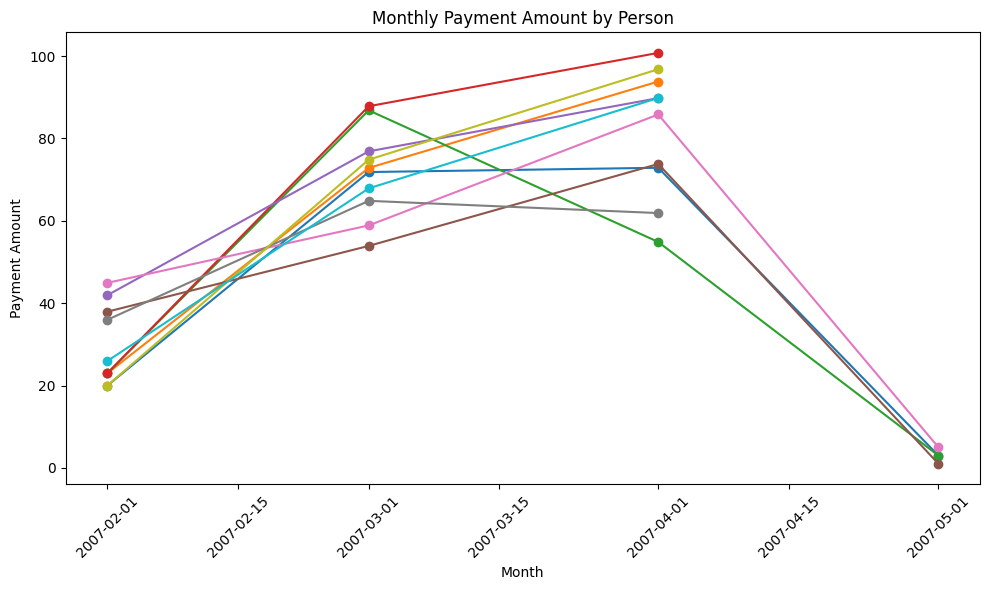

In [22]:
df = pd.read_csv("data/s2_q2.csv")
# Convert 'pay_month' to datetime
df['pay_month'] = pd.to_datetime(df['pay_month'])

# Plot
plt.figure(figsize=(10, 6))
for name, group in df.groupby('full_name'):
    plt.plot(group['pay_month'], group['pay_amount'], marker='o', label=name)

plt.title('Monthly Payment Amount by Person')
plt.xlabel('Month')
plt.ylabel('Payment Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Tt appears to be a line graph depicting the "Monthly Payment Amount by Person" over a series of months from January 20th to May 20th in a given year, potentially 2007. Each line represents a different person, with their payments varying over time.

Most individuals' payment amounts seem to increase initially and then decrease towards the end of the period. The exact reasons for these trends are not provided in the graph, but such patterns could be indicative of seasonal variability, payment due cycles, or perhaps a response to some event that is not explained by the data alone.

To draw a more comprehensive conclusion, additional context about the nature of these payments, the individuals involved, and external factors affecting these amounts would be required.

### Question 6
Query to compare the payment amounts in each successive month


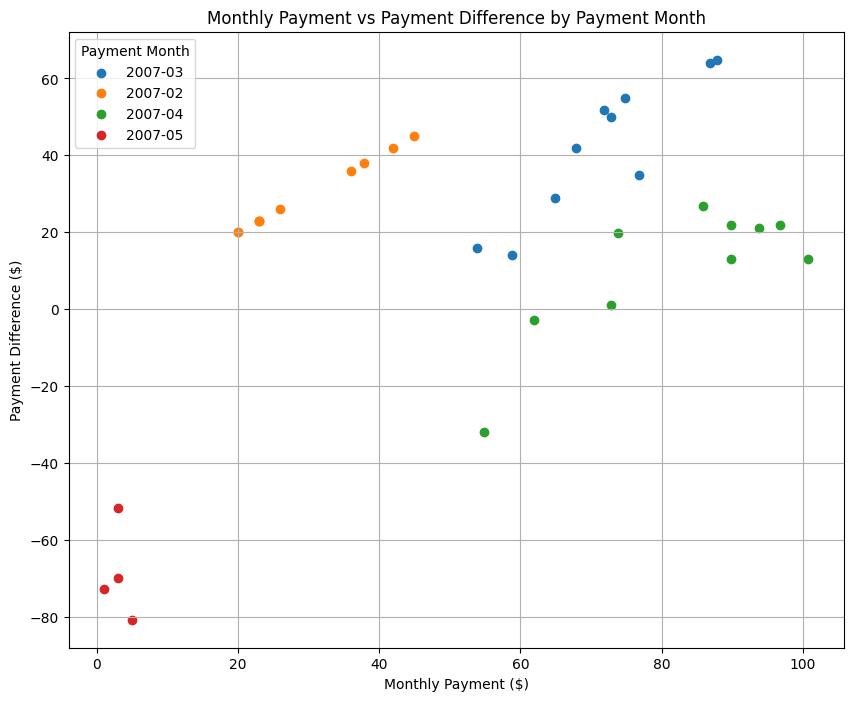

In [21]:
# Plotting
df = pd.read_csv("data/s2_q3.csv")
plt.figure(figsize=(10, 8))
for month in df['payment_month'].unique():
    subset = df[df['payment_month'] == month]
    plt.scatter(subset['monthly_payment'], subset['payment_difference'], label=month)

plt.title('Monthly Payment vs Payment Difference by Payment Month')
plt.xlabel('Monthly Payment ($)')
plt.ylabel('Payment Difference ($)')
plt.legend(title="Payment Month")
plt.grid(True)
plt.show()

It displays a comparison of monthly payments in dollars against the payment differences also in dollars, and it is color-coded by payment month: red for 2007-05, green for 2007-04, orange for 2007-03, and blue for 2007-02.

From the plot, we can observe several trends:

1. For the month of 2007-02 (blue), most of the data points are clustered in the upper right quadrant, indicating higher monthly payments and higher payment differences.

2. The data for 2007-03 (orange) are more spread out, but they also tend towards higher monthly payments and payment differences, with the majority of points being above the zero line for payment difference.

3. The month of 2007-04 (green) shows a trend towards lower monthly payments, with most of the data points situated in the middle of the plot. The payment differences are varied, with points above and below the zero difference line.

4. Finally, the month of 2007-05 (red) stands out with the lowest monthly payments and the most negative payment differences, as all its data points are in the bottom left quadrant of the plot.

The scatter plot suggests that there is some variability in monthly payments and their corresponding differences across these months. It could indicate a seasonal pattern, a change in payment behavior, or an impact from external events affecting payments in these months. The negative payment differences in May could be indicative of overpayments in previous months or adjustments made in that month.